---
title: Naive Bayes
format:
  html:
    css: "styles.css"
    embed-resources: true
    code-fold: true
---

## Introduction

Naive Bayes is a supervised machine learning algorithm based on Bayes' Theorem. It is used for classification tasks where every pair of features being classified is independent of each other. Naive Bayes leverages the probability of an event occurring given the probability of another event that has already occurred using Baye's theorem to asses the probability of a feature belonging to a class.

While Naive Bayes might seem a simple process, its results are very insightful and have been proven to work very efficiently. One of the benefits is that it needs very little data to be trained and, as more data comes in, it can always be trained incrementally. However, it assumes independence among the predictors. Thus, while being a very good model for predicting spam emails, sentiment analysis, or document categorization, it is not as robust for other more complex tasks. The three most common Naive Bayes algorithms are: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes.

On this tab, Naive Bayes will be used to predict the method of transportation ("Measure" in the data set) based on the value and the State of entrance from the Clean_Border_Crossing_Entry_Data_20231103.csv file (found in the clean data folder). While it will not be a great addition to our project, for the sake of learning and assignment fullfillment, this is a good example of how Naive Bayes works. On the other hand, more insightfull, Naive Bayes will be used in our text data to predict the sentiment of reddit posts. 

### Bayes' Theorem
The formula for Bayes' Theorem is: $P(\text{A}|\text{B}) = \frac{P(\text{B}|\text{A}) \times P(\text{A})} {P(\text{B})}$

### Gaussian Naive Bayes 
It is used when the variables are continuous and have a normal distribution

Formula:  $P(\text{class}|\text{data}) = \frac{P(\text{data}|\text{class}) \times P(\text{class})} {P(\text{data})}$

### Multinomial Naive Bayes
It is used when the variables are discrete and have a multinomial distribution.

### Bernoulli Naive Bayes
It is used when the variables are binary and have a Bernoulli distribution.

### Advantages of Naive Bayes:
- Missing values are ignored while training the model and ignored when a probability is calculated.
- Performs well even when the independence assumption is not satisfied.
- It is easily to interpretate and has fast prediction time.

### Training and Testing the model
The data for producing the model will be divided into training and testing data. The training data will account for 80% of the data and the testing data will account for 20% of the data. Then the model will be trained using the train ing data and then tested its accruacy with the testing data since it would be new data that our model has never seen before. That way, we will be able to asses the accruacy of our model or, for our text data, assess the number of features we want to take into account in order to not overfit our model and have a more accurate prediction.


## Naive Bayes for labeled record data


Naive Bayes has been used in our record data from our data set: Clean_Border_Crossing_Entry_Data_20231103.csv. The model tries to predict the method of transportation ("Measure" in the data set) based on the value and the State of entrance. The goal is to predict the method of transportation based on the value and the State of entrance. All categorical variables are converted into factor types in order to run the model (that is the variable: State). 

The scores obtained from our model are printed bellow. Due to the great number of labels, printing the confusion matrix or the overall statistics for each label will be confusing, as well as plotting the confusion matrix. Therefore, we will only print the statistics.

In [11]:
library(tidyverse)
library(caret)
library(e1071)

chicago <- read.csv('../../data/Clean_Data_project_Pub.Transport_5000/Clean_Border_Crossing_Entry_Data_20231103.csv')

numeric_cols <- chicago[sapply(chicago, is.numeric)]

scaled_numeric_cols <- as.data.frame(scale(numeric_cols))

chicago[sapply(df, is.numeric)] <- scaled_numeric_cols

vars <- c("Value", "State")

sub <- createDataPartition(y = chicago$Measure, 
                           p = 0.80, 
                           list = FALSE)

chicago[] <- lapply(chicago, as.factor)

cen_bcs <- preProcess(x = chicago[ ,vars],
                      method = c("BoxCox", "center", "scale"))

DM_bcs <- predict(object = cen_bcs,
                      newdata = chicago)

train <- DM_bcs[sub, ] 
test <- DM_bcs[-sub, ]

nb_model <- naiveBayes(Measure ~ ., data = train)

predictions <- predict(nb_model, newdata = test)

predictions <- factor(predictions, levels = levels(test$Measure))

confusion_matrix <- confusionMatrix(predictions, test$Measure)

overall_stats <- confusion_matrix$overall
print(overall_stats[c("Accuracy", "AccuracyLower", "AccuracyUpper", "Kappa", "McnemarPValue")])

Warning message in pre_process_options(method, column_types):
"The following pre-processing methods were eliminated: 'BoxCox', 'center', 'scale'"


     Accuracy AccuracyLower AccuracyUpper         Kappa McnemarPValue 
   0.16986819    0.16722706    0.17253412    0.09602056    0.00000000 


The following code could be utilized to view the confusion matrix and the overall statistics for each label. However, it has not been ran due to the reasons mentioned above.

In [ ]:
confusion_matrix_df <- as.data.frame(as.table(confusion_matrix$table))

library(ggplot2)
gg <- ggplot(data = confusion_matrix_df, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq)) +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "#7cf09b", high = "#3ee882") +
  labs(
    x = "Reference",
    y = "Prediction",
    fill = "Frequency"
  ) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12)) +
  ggtitle("Confusion Matrix")

print(gg)

### Conclusion

The model has a very low accruacy score, only 17%. This can be because this type of model is not the best for our type of data or our labels cannot be properly predicted based on the features we have since they are not deterministic on the label. Further study can be done for to see which of these two reasons is the cause of the low accuracy score. However, it seems that predicting the method of transportation based on the value and the State of entrance is not a good idea.

## Naive Bayes for labeled text data

Naive Bayes has been used in our text data from redit in order to predict the sentiment of the comments. The data has been labeled by the sentiment of the comments as shown in the data gathering tab. The data has been split into a training set and a test set. The training set has been used to train the model and the test set has been used to test the model.

Note: The following code includes a bit more parsing of the data than the one in the data cleaning tab due to some inconsistencies found in the data. Furthermore, the sentiment scores have been changed to positive if the score is greater or equal to 0 and negative if the score is less than 0.

Credits: Most of the code for this section has been changed from the code privided by Professor James Hickman from the DSAN program at Georgetown University.

In [ ]:
import re
import spacy.lang.en.stop_words as stopwords
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_json("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/sentiment_results.json")
print(df.shape)
print(df.columns)

df = df[df.text != '']
#print(df.shape)
#print(df.columns)

df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [ ]:
texts = []
y = []

parser = spacy.load('en_core_web_sm')
stop_words = stopwords.STOP_WORDS


for i in range(df.shape[0]):
    keep = "abcdefghijklmnopqrstuvwxyz "
    replace = ".,!;"
    tmp = ""
    text_value = df["text"].iloc[i]
    sentiment_value = df["sentiment"].iloc[i] 


    text_value = re.sub('[^a-zA-Z ]+', '', text_value.replace("<br />", "").lower())
    text_value = parser(text_value)
    tokens = [token.lower_ for token in text_value]

    tokens = [token.lemma_ for token in text_value if token not in stop_words]


    tmp = " ".join(tokens)
    texts.append(tmp)

    if sentiment_value == "positive":
        y.append(1)
    elif sentiment_value == "negative":
        y.append(0)

    if i < 3:
        print(i)
        print(tmp.replace("<br />", ""), '\n')
        print(tmp)
        print(sentiment_value, y[i])

y=np.array(y)



def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())

    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(texts,MAX_FEATURES=10000)


In [ ]:
vocab1 = dict([(value, key) for key, value in vocab0.items()])

df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]

print()
i1=0
vocab2={}
for i2 in list(df2.columns):

    vocab2[i1]=vocab1[int(i2)]
    i1+=1

df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

def train_MNB_model(X, Y, i_print=False):
    if i_print:
        print(X.shape, Y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = MultinomialNB()

    start = time.process_time()
    model.fit(X_train, y_train)
    time_train = time.process_time() - start

    start = time.process_time()
    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if i_print:
        print(acc_train, acc_test, time_train, time_eval)

    return acc_train, acc_test, time_train, time_eval

print(type(x), type(y))
print(x.shape, y.shape)
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, i_print=True)

def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

initialize_arrays()

def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

partial_grid_search(num_runs=100, min_index=0, max_index=1000)

partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

save_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/results_naive_bayes")

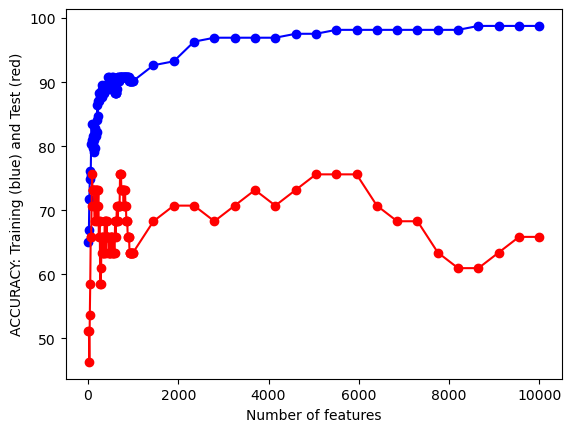

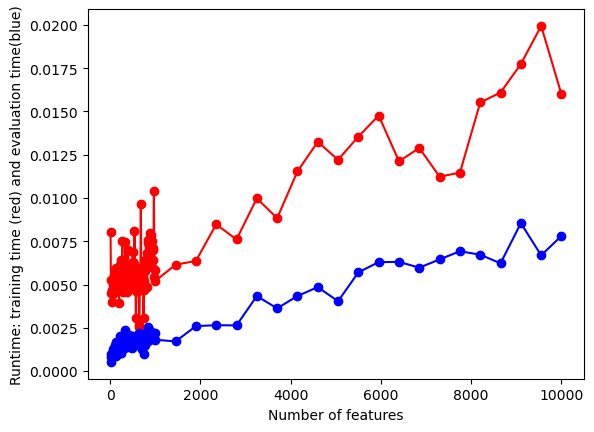

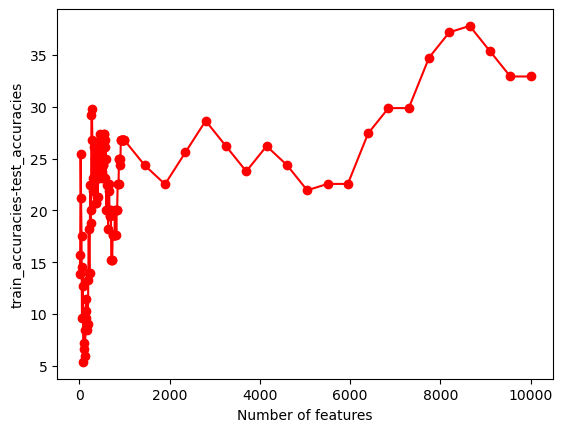

In [248]:
def plot_results(path_root):

    plt.plot(num_features,train_accuracies,'-ob')
    plt.plot(num_features,test_accuracies,'-or')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

plot_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/results_naive_bayes")

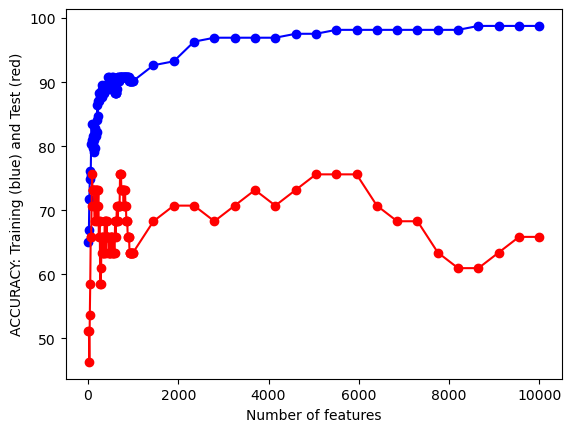

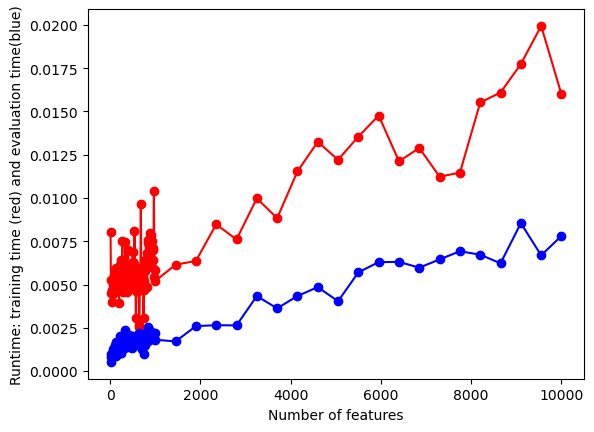

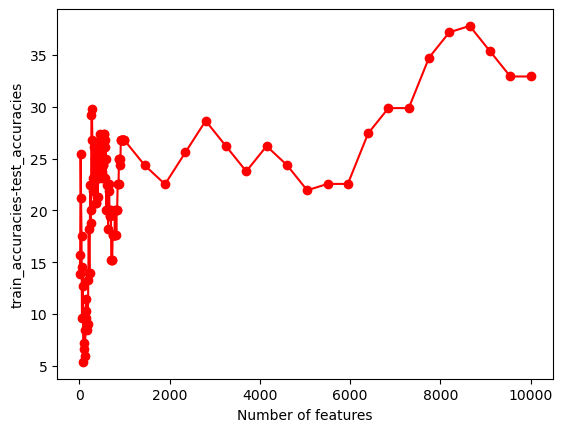

In [249]:
save_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/partial_grid_search")
plot_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/partial_grid_search")

### Conclusion

From these graphs, we can see that Naive Bayes does a good job in predicting whether the posts are positive or negative based on the text if the number of features is kept under 2000 or between 4000 and 6000. However, if the number of features is greater than 6000, the accruacy score drops significantly. This is because the model would be overfitting the data based on the training data.